# **Problem 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

print(X_train_full.shape)
print(y_train_full.shape)

print(type(X_train_full))

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(X_valid.shape)
print(y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
(55000, 28, 28)
(55000,)
(10000, 28, 28)
(10000,)
(5000, 28, 28)
(5000,)


# Build Test Data Set for only 1,2,5,9,4

In [4]:
print(X_test.shape)
print(y_test.shape)

print(type(X_test))
print(type(y_test))

print(X_test[:2])
print(y_test[:10])

m=0

X_test_12594=[]
y_test_12594=[]


for idx, u in np.ndenumerate(y_test):

  if u in [1,2,5,9,4]:
    y_test_12594.append(y_test[idx])
    X_test_12594.append(X_test[idx])


print(type( y_test_12594))
y_test_12594_np= np.array( y_test_12594)
print(type( y_test_12594_np))
print( y_test_12594_np.shape)


print(type( X_test_12594))
X_test_12594_np= np.array( X_test_12594)
print(type( X_test_12594_np))
print( X_test_12594_np.shape)

print(y_test_12594_np[:20])
print(X_test_12594_np[:20])

(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[7 2 1 0 4 1 4 9 5 9]
<class 'list'>
<class 'numpy.ndarray'>
(5050,)
<class 'list'>
<class 'numpy.ndarray'>
(5050, 28, 28)
[2 1 4 1 4 9 5 9 9 1 5 9 4 9 5 4 4 1 1 4]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 

In [5]:
def guassian_noise(image):
  row,col= image.shape
  mean = 0
  var = 0.1
  sigma = var**0.5
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  noisy = image + gauss
  return noisy

def gen_guassian_noise_img(X_imgs):
  p=0
  guassian_X_Valid = []
  for i in X_imgs:

    j = guassian_noise(i)

    k = i+j

    p = p+1
    guassian_X_Valid.append(k)
  print(p)
  #return(k)
  return guassian_X_Valid

guassian_X_Valid = gen_guassian_noise_img(X_valid)
print(type(guassian_X_Valid))
guassian_X_Valid_np= np.array(guassian_X_Valid)
print(type(guassian_X_Valid_np))
print(guassian_X_Valid_np.shape)

guassian_X_test = gen_guassian_noise_img(X_test)
print(type(guassian_X_test))
guassian_X_test_np= np.array(guassian_X_test)
print(type(guassian_X_test_np))
print(guassian_X_test_np.shape)



guassian_X_test_12594 = gen_guassian_noise_img(X_test_12594_np)
print(type(guassian_X_test_12594))
guassian_X_test_12594_np= np.array(guassian_X_test_12594)
print(type(guassian_X_test_12594_np))
print(guassian_X_test_12594_np.shape)



5000
<class 'list'>
<class 'numpy.ndarray'>
(5000, 28, 28)
10000
<class 'list'>
<class 'numpy.ndarray'>
(10000, 28, 28)
5050
<class 'list'>
<class 'numpy.ndarray'>
(5050, 28, 28)


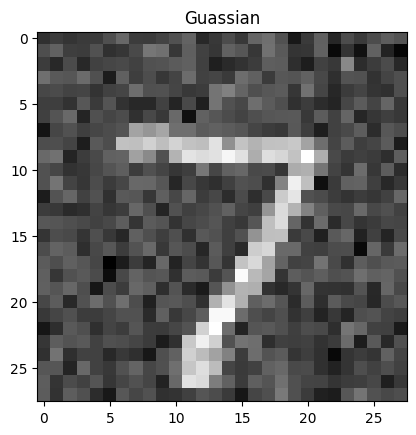

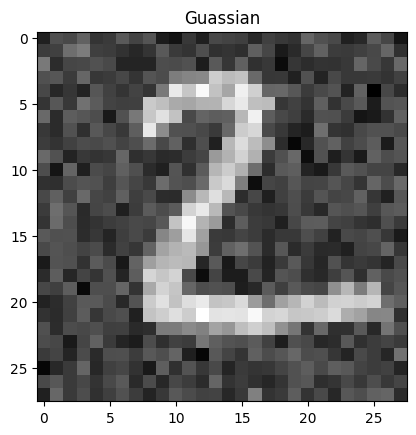

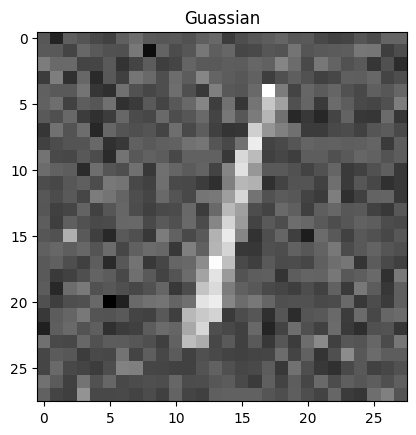

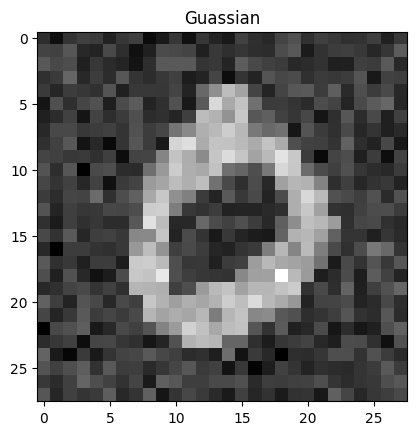

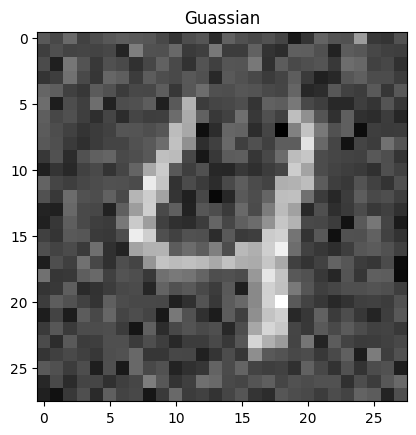

In [6]:
for i in guassian_X_test_np[:5]:
    plt.imshow(i, cmap='gray')
    plt.title('Guassian')
    plt.show()

In [7]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

# Coding Size: 64

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[64]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [11]:
stacked_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30)                81530     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            82284     
                                                                 
Total params: 163814 (639.90 KB)
Trainable params: 163814 (639.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 3ms/step - loss: 0.1737 - rounded_accuracy: 0.9244 - val_loss: 0.1281 - val_rounded_accuracy: 0.9512
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1220 - rounded_accuracy: 0.9537 - val_loss: 0.1102 - val_rounded_accuracy: 0.9608
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1104 - rounded_accuracy: 0.9602 - val_loss: 0.1017 - val_rounded_accuracy: 0.9660
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1045 - rounded_accuracy: 0.9635 - val_loss: 0.0975 - val_rounded_accuracy: 0.9685
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1011 - rounded_accuracy: 0.9655 - val_loss: 0.0946 - val_rounded_accuracy: 0.9702
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0989 - rounded_accuracy: 0.9668 - val_loss: 0.0921 - val_rounded_accuracy: 0.9716
Epoch 7/20
1719/1719 [=================

2/2 [==============================] - 0s 4ms/step
Saving figure reconstruction_plot


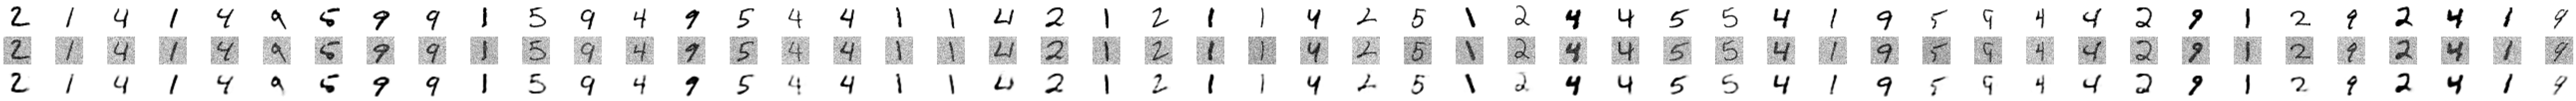

In [16]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join( fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def show_reconstructions(model, images=X_test_12594_np, guassian_images= guassian_X_test_12594_np, n_images=50):
    reconstructions = model.predict(images[:n_images])
    #fig = plt.figure(figsize=(n_images * 1.5, 3))
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(3, n_images, 1 +  n_images + image_index)
        plot_image(guassian_images[image_index])
        #print(reconstructions.shape)
        plt.subplot(3, n_images, 1 + (n_images*2) + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)
save_fig("reconstruction_plot")

158/158 [==============================] - 0s 1ms/step


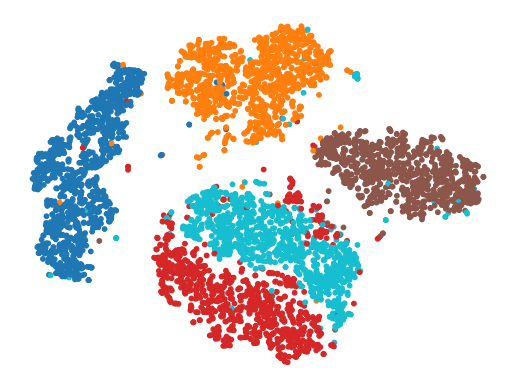

In [15]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test_12594_np)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)
X_test2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot


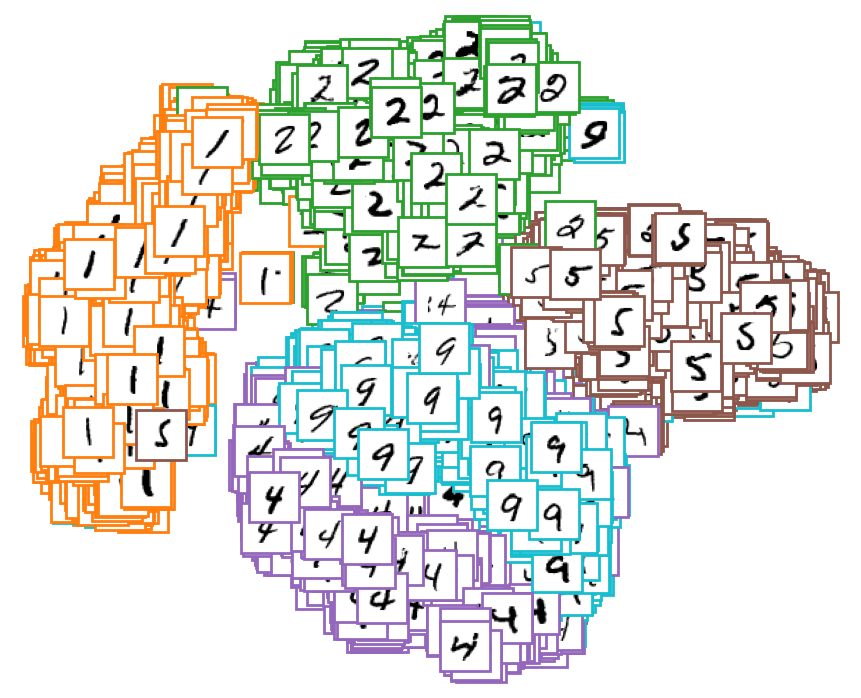

In [17]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test_12594_np[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test_12594_np[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot")
plt.show()

Coding Size: 32

In [18]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(32, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[32]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

stacked_ae.summary()

history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 32)                81732     
                                                                 
 sequential_10 (Sequential)  (None, 28, 28)            82484     
                                                                 
Total params: 164216 (641.47 KB)
Trainable params: 164216 (641.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.1841 - rounded_accuracy: 0.9181 - val_loss: 0.1423 - val_rounded_accuracy: 0.9430
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1352 - rounded_accuracy: 0.9458 - val_loss: 0.1247 - val_rounded_accuracy: 0.9520
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1238 - roun

2/2 [==============================] - 0s 4ms/step
Saving figure reconstruction_plot_32


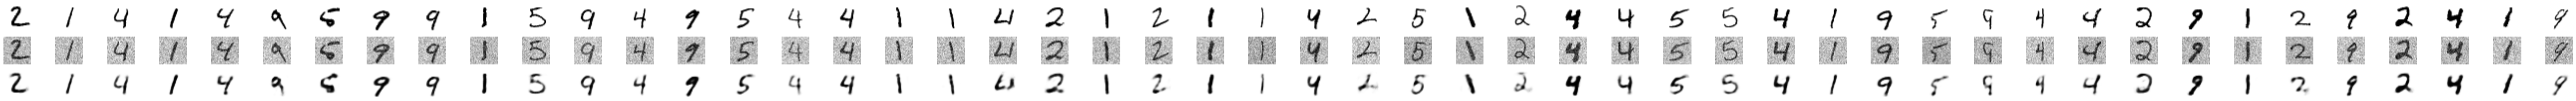

In [19]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join( fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def show_reconstructions(model, images=X_test_12594_np, guassian_images= guassian_X_test_12594_np, n_images=50):
    reconstructions = model.predict(images[:n_images])
    #fig = plt.figure(figsize=(n_images * 1.5, 3))
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(3, n_images, 1 +  n_images + image_index)
        plot_image(guassian_images[image_index])
        #print(reconstructions.shape)
        plt.subplot(3, n_images, 1 + (n_images*2) + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)
save_fig("reconstruction_plot_32")

158/158 [==============================] - 0s 1ms/step


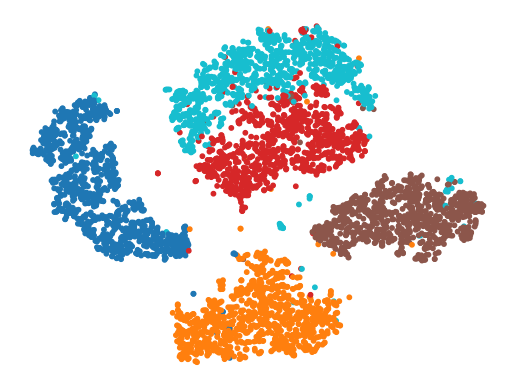

In [20]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test_12594_np)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)
X_test2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot_32


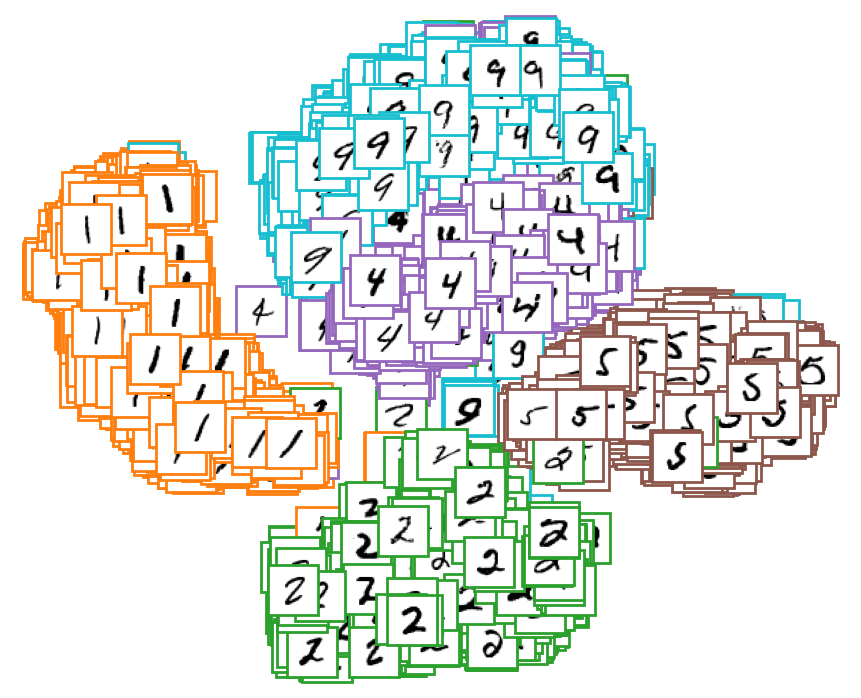

In [21]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test_12594_np[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test_12594_np[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot_32")
plt.show()

# Coding Size 16

In [22]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(16, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[16]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])


stacked_ae.summary()

history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 16)                80116     
                                                                 
 sequential_13 (Sequential)  (None, 28, 28)            80884     
                                                                 
Total params: 161000 (628.91 KB)
Trainable params: 161000 (628.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.1922 - rounded_accuracy: 0.9129 - val_loss: 0.1581 - val_rounded_accuracy: 0.9325
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1547 - rounded_accuracy: 0.9339 - val_loss: 0.1473 - val_rounded_accuracy: 0.9387
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1472 - roun

2/2 [==============================] - 0s 3ms/step
Saving figure reconstruction_plot_16


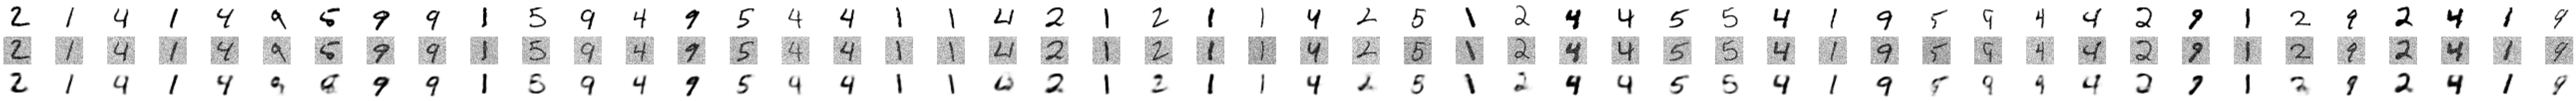

In [23]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join( fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def show_reconstructions(model, images=X_test_12594_np, guassian_images= guassian_X_test_12594_np, n_images=50):
    reconstructions = model.predict(images[:n_images])
    #fig = plt.figure(figsize=(n_images * 1.5, 3))
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(3, n_images, 1 +  n_images + image_index)
        plot_image(guassian_images[image_index])
        #print(reconstructions.shape)
        plt.subplot(3, n_images, 1 + (n_images*2) + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)
save_fig("reconstruction_plot_16")

158/158 [==============================] - 0s 1ms/step


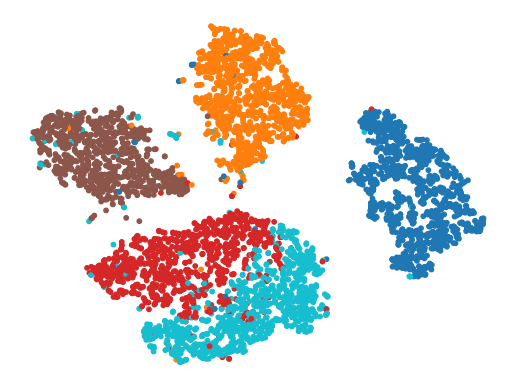

In [24]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test_12594_np)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)
X_test2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot_16


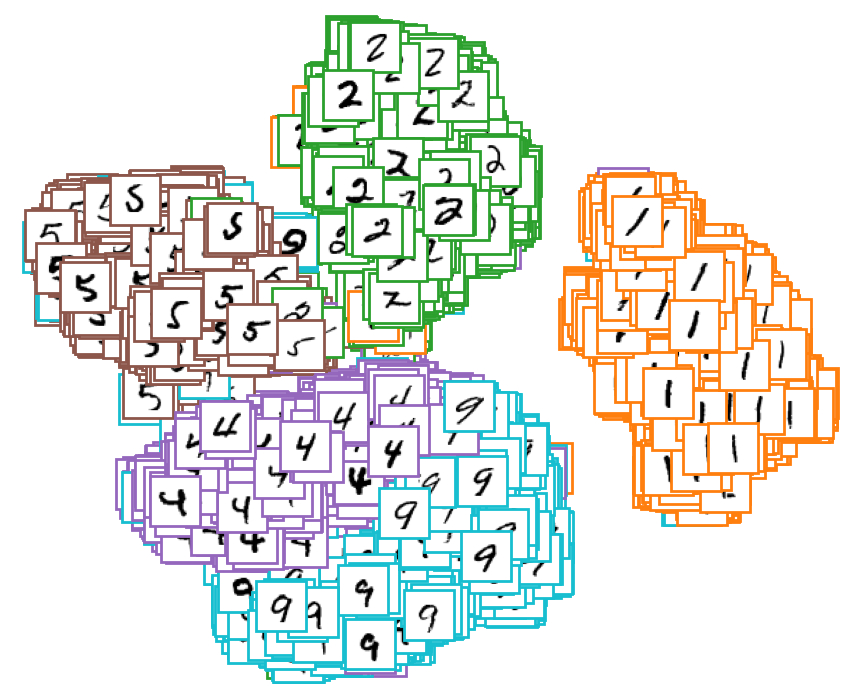

In [25]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test_12594_np[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test_12594_np[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot_16")
plt.show()

# Coding Size 8

In [26]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(8, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[8]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])


stacked_ae.summary()

history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 8)                 79308     
                                                                 
 sequential_16 (Sequential)  (None, 28, 28)            80084     
                                                                 
Total params: 159392 (622.62 KB)
Trainable params: 159392 (622.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.2181 - rounded_accuracy: 0.8954 - val_loss: 0.1921 - val_rounded_accuracy: 0.9098
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1875 - rounded_accuracy: 0.9124 - val_loss: 0.1816 - val_rounded_accuracy: 0.9162
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1794 - roun

2/2 [==============================] - 0s 3ms/step
Saving figure reconstruction_plot_8


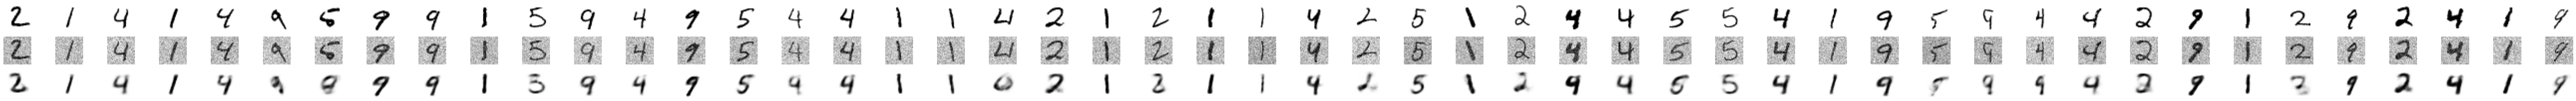

In [27]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join( fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def show_reconstructions(model, images=X_test_12594_np, guassian_images= guassian_X_test_12594_np, n_images=50):
    reconstructions = model.predict(images[:n_images])
    #fig = plt.figure(figsize=(n_images * 1.5, 3))
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(3, n_images, 1 +  n_images + image_index)
        plot_image(guassian_images[image_index])
        #print(reconstructions.shape)
        plt.subplot(3, n_images, 1 + (n_images*2) + image_index)
        plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)
save_fig("reconstruction_plot_8")

158/158 [==============================] - 0s 1ms/step


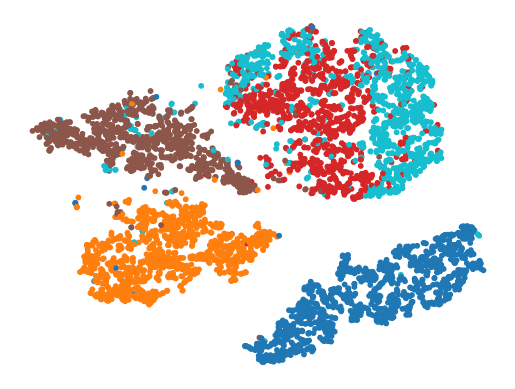

In [28]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_test_compressed = stacked_encoder.predict(X_test_12594_np)
tsne = TSNE()
X_test_2D = tsne.fit_transform(X_test_compressed)
X_test2D = (X_test_2D - X_test_2D.min()) / (X_test_2D.max() - X_test_2D.min())
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap="tab10")
plt.axis("off")
plt.show()

Saving figure fashion_mnist_visualization_plot_8


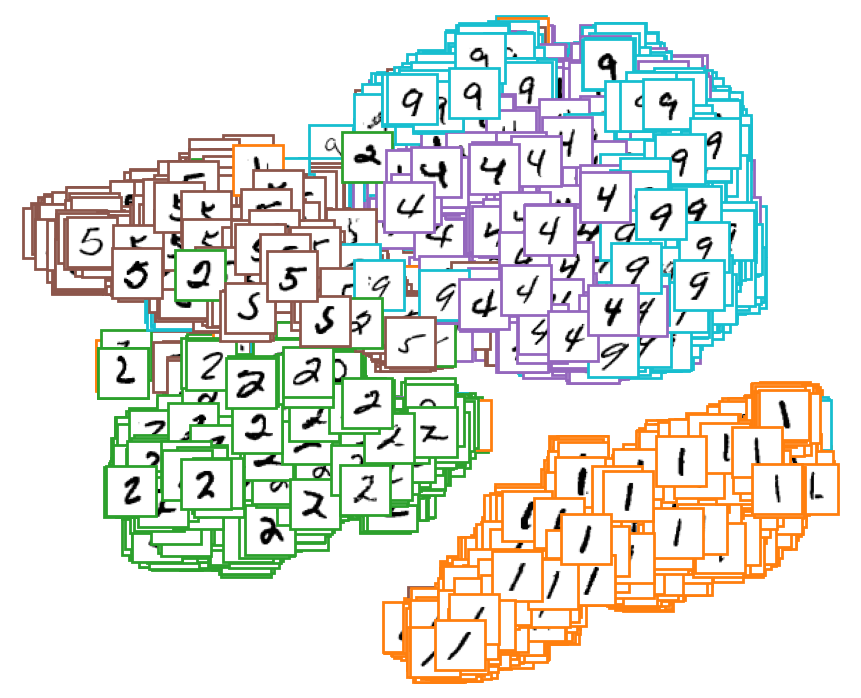

In [29]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test_12594_np, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_test_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test_12594_np[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test_12594_np[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
save_fig("fashion_mnist_visualization_plot_8")
plt.show()

# **It is better to go with a coding size of 64 as it has the highest validation Accuracy and clusters in the manifold have minimal overlap in comparison to that of others.**
**Val_accuracy for coding_size: 64 is 0.9775
Val_accuracy for coding_size: 32 is 0.9694
Val_accuracy for coding_size: 16 is 0.9562
Val_accuracy for coding_size: 8 is 0.9432**

# **Problem 2**

Using a coding_size of 64 with Conv2D instead of dense as it has the best accuarcy from problem #1.

In [30]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 [==============================] - 14s 5ms/step - loss: 0.1095 - rounded_accuracy: 0.9615 - val_loss: 0.0876 - val_rounded_accuracy: 0.9741
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0829 - rounded_accuracy: 0.9769 - val_loss: 0.0833 - val_rounded_accuracy: 0.9770
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0784 - rounded_accuracy: 0.9799 - val_loss: 0.0773 - val_rounded_accuracy: 0.9809
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0761 - rounded_accuracy: 0.9815 - val_loss: 0.0779 - val_rounded_accuracy: 0.9802
Epoch 5/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0746 - rounded_accuracy: 0.9826 - val_loss: 0.0790 - val_rounded_accuracy: 0.9796


In [31]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)        

In [37]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    path = os.path.join( fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def show_reconstructions(model, images=X_test_12594_np, guassian_images= guassian_X_test_12594_np, n_images=50):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(3, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(3, n_images, 1 +  n_images + image_index)
        plot_image(guassian_images[image_index])
        #print(reconstructions.shape)
        plt.subplot(3, n_images, 1 + (n_images*2) + image_index)
        plot_image(reconstructions[image_index])

2/2 [==============================] - 0s 3ms/step


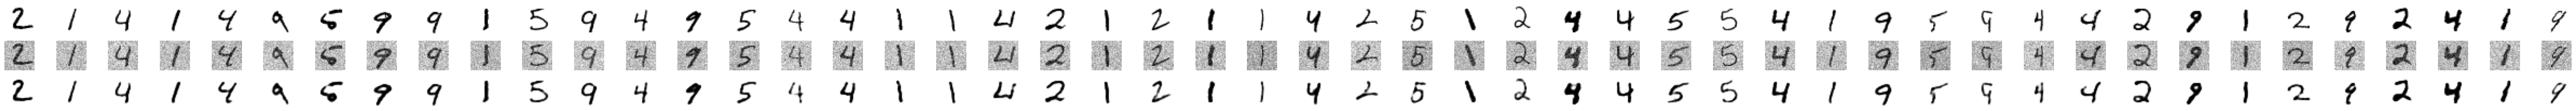

In [38]:
show_reconstructions(conv_ae)
plt.show()

# Using Conv2D with Codings Size of 64 gives better image quality and higher accuracy of 0.9809 vs. that of dense layer with a coding_size: 64 is 0.9775.

# So it is better to use CONV2D with codings size of 64.